In [1]:
from ptt import Board
from requests.exceptions import ReadTimeout
import time
import random 
from wordcloud import WordCloud

In [9]:
#修改ptt板位
Board_Name = 'movie'

In [10]:
# 路徑如果只有檔名稱就代表字體檔與python 檔必須放在同個資料夾中
font_path = '微软正黑体.ttf'

# 紀錄
titles = ''
# 抓該板首頁的文章
latest_page = Board(Board_Name)

正在抓資料中...[版規] 盜版版規細項討論
正在抓資料中...[公告] 關於跑步哥
正在抓資料中...[公告] 獎季發文限制放寬
正在抓資料中...[公告] 板規新增每日發文上限規定
正在抓資料中...[公告] 板規 2019/12/30
正在抓資料中...[討論] 阿甘正傳的阿甘兒子是阿甘的兒子嗎？
正在抓資料中...[問片] 半夜的公路恐怖片
正在抓資料中...[問片] 2004-2007上映跟雙胞胎有關的鬼片
正在抓資料中...[新聞] 徐譽庭新片男女主角曝光
正在抓資料中...[  雷] 古惑仔三，當年上映評價如何？
正在抓資料中...[討論] 小丑是不是有用DC騙票房的嫌疑阿？(雷)
正在抓資料中...[贈票] 【隱形人】北中南特映會搶先看
正在抓資料中...[問片] 印象中小孩在醫院消失的片
正在抓資料中...[好雷]《失控危城》
正在抓資料中...Re: [新聞] 拿鈔票擦眼淚！《復仇者聯盟 4》竟成影史
正在抓資料中...[討論] 奧斯卡視覺特效得主回顧
正在抓資料中...[新聞] 《權力遊戲》23歲蘇菲特納被爆懷孕了
正在抓資料中...[無雷] 破夢遊戲2018：中國第一部Cyberpunk電影!


(-0.5, 399.5, 199.5, -0.5)

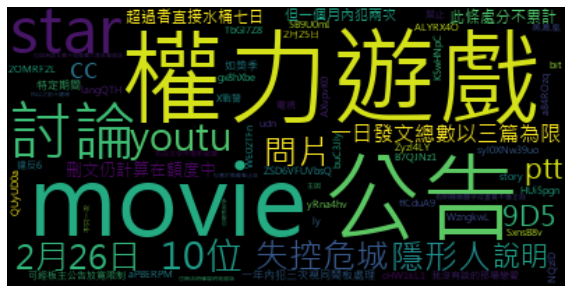

In [11]:
for summary in latest_page:
    if summary.isremoved:
        continue
    
    time.sleep(random.randint(1,3))
    print('正在抓資料中...'+summary.title)
    
    try:
        article = summary.read()
        
    except ReadTimeout:
        pass
    
    # 將所有內容儲存在一個文字上
    titles += article.content+article.title

# 無意義字元列表，可以自行新增
removeword = ['span','class','f3','https','imgur','h1','_blank','href','rel',
              'nofollow','target','cdn','cgi','b4','jpg','hl','b1','f5','f4',
              'goo.gl','f2','email','map','f1','f6','__cf___','data','bbs'
              'html','cf','f0','b2','b3','b5','b6','原文內容','原文連結','作者'
              '標題','時間','看板','問卦','ppt cc','bbs','html','gossiping','新聞','文章網址']

# 移除無意義字元列
for word in removeword:
    titles = titles.replace(word,'')

# 產生文字雲
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path=font_path).generate(titles)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")